<a href="https://colab.research.google.com/github/Prabhu-2004-04/Deep-Learning/blob/main/Plant_diease_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from google.colab import files
import os
import zipfile
import shutil
from sklearn.model_selection import train_test_split

# Upload dataset zip file
print("Please upload the BananaLSD dataset zip file (archive.zip from Kaggle)")
uploaded = files.upload()
extract_dir = '/content/BananaLSD'


# Extract the uploaded zip file
for filename in uploaded.keys():
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall('/content/BananaLSD')
    os.remove(filename)



Please upload the BananaLSD dataset zip file (archive.zip from Kaggle)


Saving archive(2).zip to archive(2).zip


Extracted contents:
/content/BananaLSD:
BananaLSD

/content/BananaLSD/BananaLSD:
AugmentedSet  OriginalSet

/content/BananaLSD/BananaLSD/AugmentedSet:
cordana  healthy  pestalotiopsis  sigatoka

/content/BananaLSD/BananaLSD/AugmentedSet/cordana:
0_aug.jpeg    152_aug.jpeg  204_aug.jpeg  257_aug.jpeg	309_aug.jpeg  361_aug.jpeg  53_aug.jpeg
100_aug.jpeg  153_aug.jpeg  205_aug.jpeg  258_aug.jpeg	30_aug.jpeg   362_aug.jpeg  54_aug.jpeg
101_aug.jpeg  154_aug.jpeg  206_aug.jpeg  259_aug.jpeg	310_aug.jpeg  363_aug.jpeg  55_aug.jpeg
102_aug.jpeg  155_aug.jpeg  207_aug.jpeg  25_aug.jpeg	311_aug.jpeg  364_aug.jpeg  56_aug.jpeg
103_aug.jpeg  156_aug.jpeg  208_aug.jpeg  260_aug.jpeg	312_aug.jpeg  365_aug.jpeg  57_aug.jpeg
104_aug.jpeg  157_aug.jpeg  209_aug.jpeg  261_aug.jpeg	313_aug.jpeg  366_aug.jpeg  58_aug.jpeg
105_aug.jpeg  158_aug.jpeg  20_aug.jpeg   262_aug.jpeg	314_aug.jpeg  367_aug.jpeg  59_aug.jpeg
106_aug.jpeg  159_aug.jpeg  210_aug.jpeg  263_aug.jpeg	315_aug.jpeg  368_aug.jpeg  5_aug.j

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 66s 3s/step - accuracy: 0.5364 - loss: 1.0755 - val_accuracy: 0.7164 - val_loss: 0.5485
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.7803 - loss: 0.4794 - val_accuracy: 0.8364 - val_loss: 0.3777
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.8705 - loss: 0.3501 - val_accuracy: 0.8473 - val_loss: 0.3335
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.8724 - loss: 0.3464 - val_accuracy: 0.8255 - val_loss: 0.4030
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.8656 - loss: 0.3665 - val_accuracy: 0.8436 - val_loss: 0.3734
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.8581 - loss: 0.3823 - val_accuracy: 0.8582 - val_loss: 0.3255
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.8622 - loss: 0.3242 - val_accuracy: 0.8800 - val_loss: 0.2799
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.8906 - loss: 0.3108 - val_accuracy: 0.8727 - val_loss:

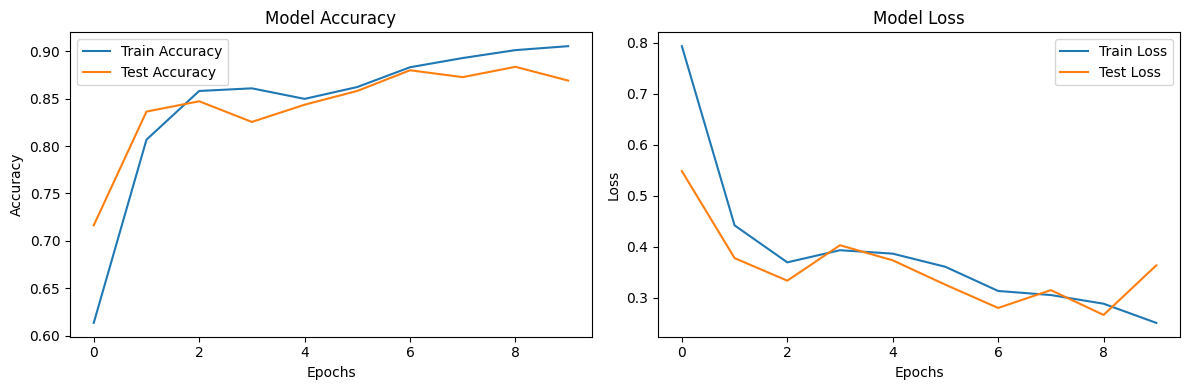

Please upload a banana leaf image for prediction


Saving 0_aug.jpeg to 0_aug.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Prediction Score: 0.00
Healthy Banana Leaf Detected


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:


# Debug: List the extracted contents
print("Extracted contents:")
!ls -R "$extract_dir"

# Adjust source_dir based on actual structure
source_dir = os.path.join(extract_dir, 'AugmentedSet')
if not os.path.exists(source_dir):
    # Look for AugmentedSet in subdirectories
    for root, dirs, _ in os.walk(extract_dir):
        if 'AugmentedSet' in dirs:
            source_dir = os.path.join(root, 'AugmentedSet')
            break
    if not os.path.exists(source_dir):
        raise FileNotFoundError(f"Could not find 'AugmentedSet' in {extract_dir}")

print(f"Using source directory: {source_dir}")

# Check if healthy directory exists (lowercase)
healthy_dir = os.path.join(source_dir, 'healthy')
if not os.path.exists(healthy_dir):
    print(f"Error: Directory not found: {healthy_dir}")
    print(f"Available directories in {source_dir}:")
    print(os.listdir(source_dir))
    raise FileNotFoundError(f"Directory not found: {healthy_dir}")

# Create train and test directories
base_dir = '/content/dataset'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Define class directories
train_healthy = os.path.join(train_dir, 'healthy')
train_diseased = os.path.join(train_dir, 'diseased')
test_healthy = os.path.join(test_dir, 'healthy')
test_diseased = os.path.join(test_dir, 'diseased')

for dir_path in [train_healthy, train_diseased, test_healthy, test_diseased]:
    os.makedirs(dir_path, exist_ok=True)

# Gather all images
healthy_images = [os.path.join(source_dir, 'healthy', f) for f in os.listdir(healthy_dir) if f.endswith('.jpeg')]
disease_classes = ['sigatoka', 'cordana', 'pestalotiopsis']
diseased_images = []
for cls in disease_classes:
    cls_dir = os.path.join(source_dir, cls)
    if os.path.exists(cls_dir):
        diseased_images.extend([os.path.join(cls_dir, f) for f in os.listdir(cls_dir) if f.endswith('.jpeg')])
    else:
        print(f"Warning: Directory not found: {cls_dir}")

# Split into train and test (80% train, 20% test)
train_healthy_imgs, test_healthy_imgs = train_test_split(healthy_images, test_size=0.2, random_state=42)
train_diseased_imgs, test_diseased_imgs = train_test_split(diseased_images, test_size=0.2, random_state=42)

# Copy files to respective directories
for img in train_healthy_imgs:
    shutil.copy(img, train_healthy)
for img in test_healthy_imgs:
    shutil.copy(img, test_healthy)
for img in train_diseased_imgs:
    shutil.copy(img, train_diseased)
for img in test_diseased_imgs:
    shutil.copy(img, test_diseased)

# Data augmentation for training images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Only rescale test images
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and prepare training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Load and prepare test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

# Train the model
epochs = 10
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator
)

# Plot training results
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Function to predict banana disease
def predict_banana_disease(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]
    print(f"Prediction Score: {prediction:.2f}")

    if prediction > 0.7:
        print("Diseased Banana Leaf Detected")
    else:
        print("Healthy Banana Leaf Detected")

    return prediction



In [13]:
# Upload a test image
print("Please upload a banana leaf image for prediction")
uploaded_image = files.upload()
image_path = list(uploaded_image.keys())[0]

# Make prediction on uploaded image
predict_banana_disease(image_path)

# Save and download the model
model.save('/content/banana_disease_classifier.h5')
files.download('/content/banana_disease_classifier.h5')

Please upload a banana leaf image for prediction


Saving 0_aug.jpeg to 0_aug (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Prediction Score: 0.00
Healthy Banana Leaf Detected


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Prediction Score: 0.02
Diseased Banana Leaf Detected
Suggested Cure: Remove infected leaves and spray copper oxychloride (3 g/L) every 10-14 days.


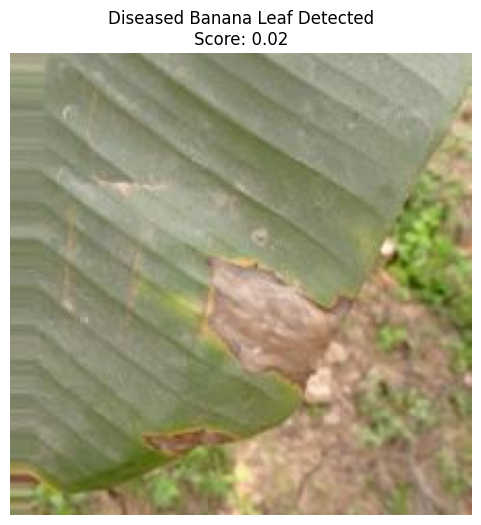

0.020215774

In [27]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('banana_disease_classifier.h5')

def predict_banana_disease(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]

    if prediction > 0.7:
        result = "Healthy Banana Leaf Detected"
        cure = "Maintain regular care; no treatment needed."

    else:
         result = "Diseased Banana Leaf Detected"
         cure = "Remove infected leaves and spray copper oxychloride (3 g/L) every 10-14 days."

    print(f"Prediction Score: {prediction:.2f}")
    print(result)
    print("Suggested Cure:", cure)

    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f"{result}\nScore: {prediction:.2f}", fontsize=12)
    plt.axis('off')
    plt.show()

    return prediction

# Replace with your image path
image_path = '/content/BananaLSD/BananaLSD/AugmentedSet/cordana/103_aug.jpeg'
predict_banana_disease(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Prediction Score: 0.97
Healthy Banana Leaf Detected
Suggested Cure: Maintain regular care; no treatment needed.


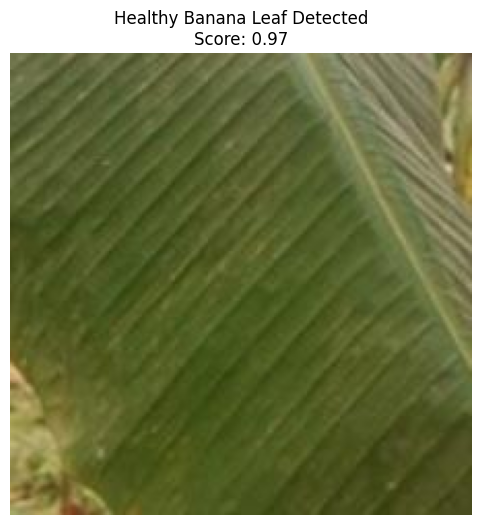

0.97357047

In [28]:
model = tf.keras.models.load_model('banana_disease_classifier.h5')

def predict_banana_disease(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]

    if prediction > 0.7:
        result = "Healthy Banana Leaf Detected"
        cure = "Maintain regular care; no treatment needed."

    else:
         result = "Diseased Banana Leaf Detected"
         cure = "Remove infected leaves and spray copper oxychloride (3 g/L) every 10-14 days."

    print(f"Prediction Score: {prediction:.2f}")
    print(result)
    print("Suggested Cure:", cure)

    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f"{result}\nScore: {prediction:.2f}", fontsize=12)
    plt.axis('off')
    plt.show()

    return prediction

# Replace with your image path
image_path = '/content/BananaLSD/BananaLSD/AugmentedSet/healthy/105_aug.jpeg'
predict_banana_disease(image_path)

Please upload up to 10 banana leaf images.


Saving 0_aug.jpeg to 0_aug (2).jpeg
Saving 1_aug.jpeg to 1_aug.jpeg
Saving 3_aug.jpeg to 3_aug.jpeg
Saving 30_aug.jpeg to 30_aug.jpeg
Saving 33_aug.jpeg to 33_aug.jpeg
Saving 207_aug.jpeg to 207_aug.jpeg
Saving 14_aug.jpeg to 14_aug.jpeg
Saving 98_aug.jpeg to 98_aug.jpeg
Saving 165_aug.jpeg to 165_aug.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step

Image: 0_aug (2).jpeg
Prediction Score: 0.00
Result: Diseased
Suggested Cure: Remove infected leaves; spray copper oxychloride (3 g/L) every 10-14 days.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step

Image: 1_aug.jpeg
Prediction Score: 0.00
Result: Diseased
Suggested Cure: Remove infected leaves; spray copper oxychloride (3 g/L) every 10-14 days.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step

Image: 3_aug.jpeg
Prediction Score: 0.00
Result: Diseased
Suggested Cure: Remove infected leaves; spray copper oxychloride (3 g/L) every 10-14 days.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step

Image: 30_aug.jpeg
Prediction Score: 0.01
Result: Diseased
Suggested Cure: Remove in

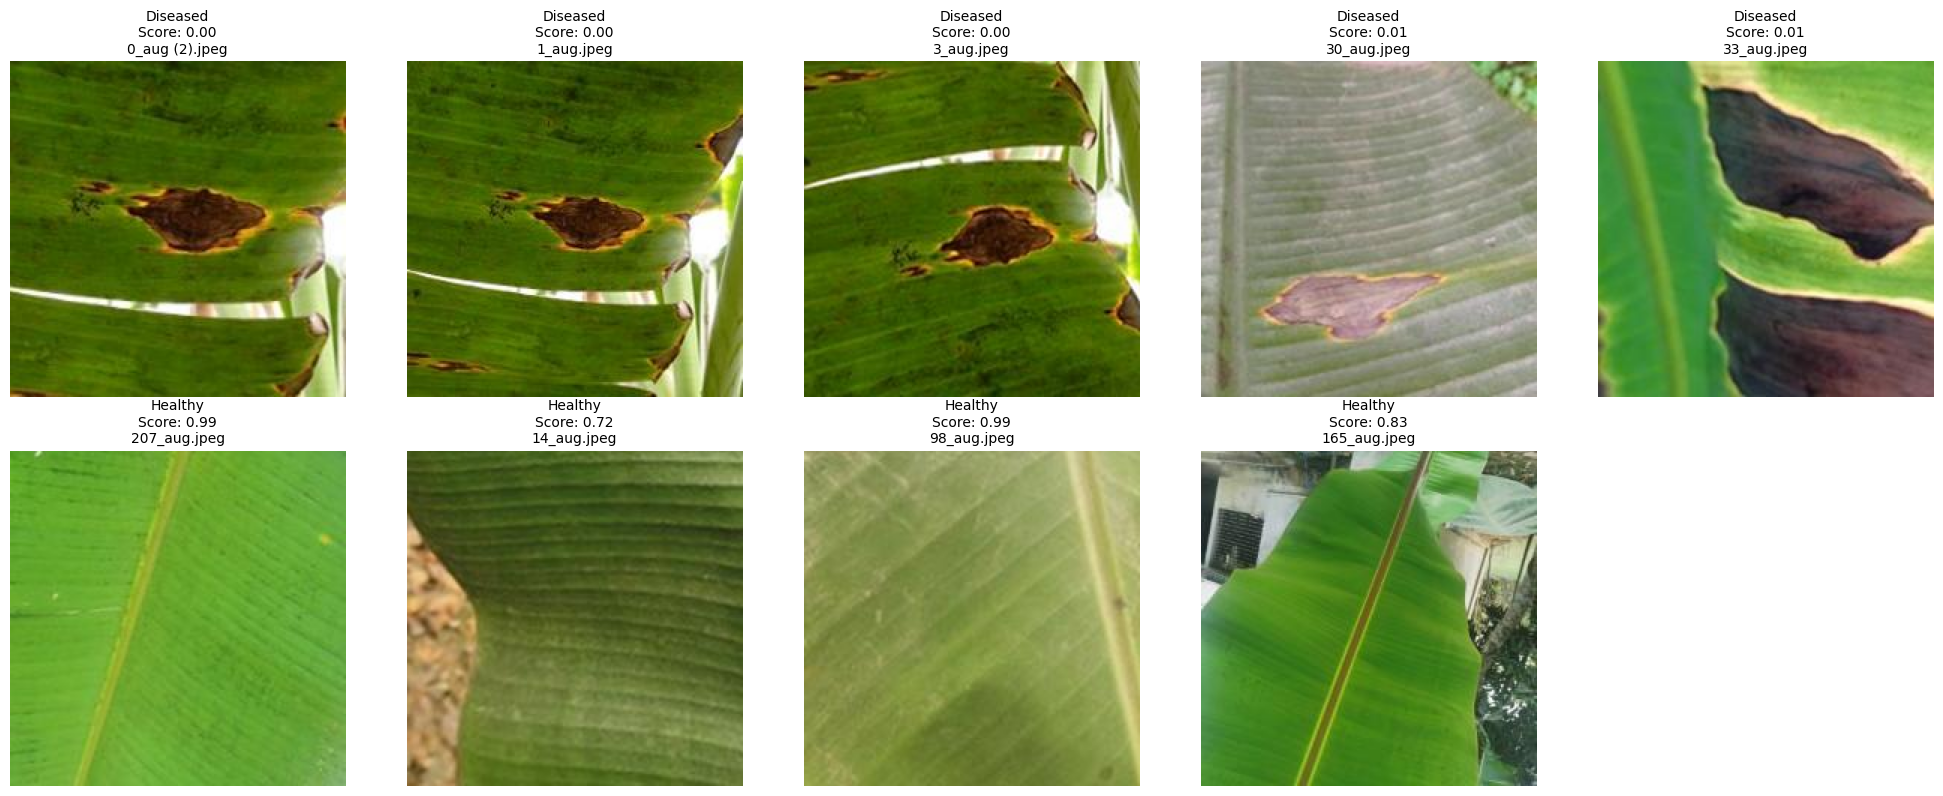

In [32]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import os

# Load the model
model = tf.keras.models.load_model('banana_disease_classifier.h5')

# Recompile the model to avoid the warning (using same settings as training)
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Function to predict banana disease and return result with cure
def predict_banana_disease(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]

    if prediction > 0.7:
        result = "Healthy"
        cure = "Maintain regular care; no treatment needed."
    else:

        result = "Diseased"
        cure = "Remove infected leaves; spray copper oxychloride (3 g/L) every 10-14 days."

    return img, prediction, result, cure

# Function to process and display multiple images
def process_multiple_images(image_dict):
    if not image_dict:
        print("No images uploaded.")
        return

    # Limit to 10 images
    image_paths = list(image_dict.keys())[:10]
    num_images = len(image_paths)

    # Save uploaded images temporarily
    for filename in image_paths:
        with open(filename, 'wb') as f:
            f.write(image_dict[filename])

    # Set up the grid: 2 rows if >5 images, 5 columns max per row
    rows = 2 if num_images > 5 else 1
    cols = min(num_images, 5) if num_images <= 5 else 5

    # Create figure
    plt.figure(figsize=(cols * 4, rows * 4))

    # Process each image
    for i, img_path in enumerate(image_paths):
        img, prediction, result, cure = predict_banana_disease(img_path)
        filename = os.path.basename(img_path)

        print(f"\nImage: {filename}")
        print(f"Prediction Score: {prediction:.2f}")
        print(f"Result: {result}")
        print(f"Suggested Cure: {cure}")

        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.title(f"{result}\nScore: {prediction:.2f}\n{filename}", fontsize=10)
        plt.axis('off')

        # Clean up temporary file
        os.remove(img_path)

    plt.tight_layout()
    plt.show()

# Upload multiple images in Colab
print("Please upload up to 10 banana leaf images.")
uploaded = files.upload()

# Process the uploaded images
process_multiple_images(uploaded)

Found 1280 images belonging to 4 classes.
Found 320 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 104s 3s/step - accuracy: 0.3808 - loss: 1.6730 - val_accuracy: 0.5312 - val_loss: 1.0421
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.5612 - loss: 1.0116 - val_accuracy: 0.7469 - val_loss: 0.7227
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.6805 - loss: 0.7867 - val_accuracy: 0.7594 - val_loss: 0.7031
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.7311 - loss: 0.6940 - val_accuracy: 0.8125 - val_loss: 0.5877
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.7170 - loss: 0.7181 - val_accuracy: 0.7875 - val_loss: 0.6049
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.7191 - loss: 0.7255 - val_accuracy: 0.7125 - val_loss: 0.7233
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.7459 - loss: 0.6728 - val_accuracy: 0.8000 - val_loss: 0.5865
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.8038 - loss: 0.5701 - val_accuracy: 0.8125 - val_loss

Please upload up to 10 banana leaf images for disease prediction.


Saving 0_aug.jpeg to 0_aug (2).jpeg
Saving 1_aug.jpeg to 1_aug.jpeg
Saving 3_aug.jpeg to 3_aug.jpeg
Saving 14_aug.jpeg to 14_aug.jpeg
Saving 30_aug.jpeg to 30_aug.jpeg
Saving 33_aug.jpeg to 33_aug.jpeg
Saving 98_aug.jpeg to 98_aug.jpeg
Saving 165_aug.jpeg to 165_aug.jpeg
Saving 207_aug.jpeg to 207_aug.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step

Image: 0_aug (2).jpeg
Predicted Disease: Cordana
Confidence: 1.00
Suggested Cure: Apply copper oxychloride (3 g/L); improve air circulation.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

Image: 1_aug.jpeg
Predicted Disease: Cordana
Confidence: 0.99
Suggested Cure: Apply copper oxychloride (3 g/L); improve air circulation.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

Image: 3_aug.jpeg
Predicted Disease: Cordana
Confidence: 1.00
Suggested Cure: Apply copper oxychloride (3 g/L); improve air circulation.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step

Image: 14_aug.jpeg
Predicted Disease: Pestalotiopsis
Confidence: 0.87
Suggested Cure: Use mancozeb (0.2%); prune affecte

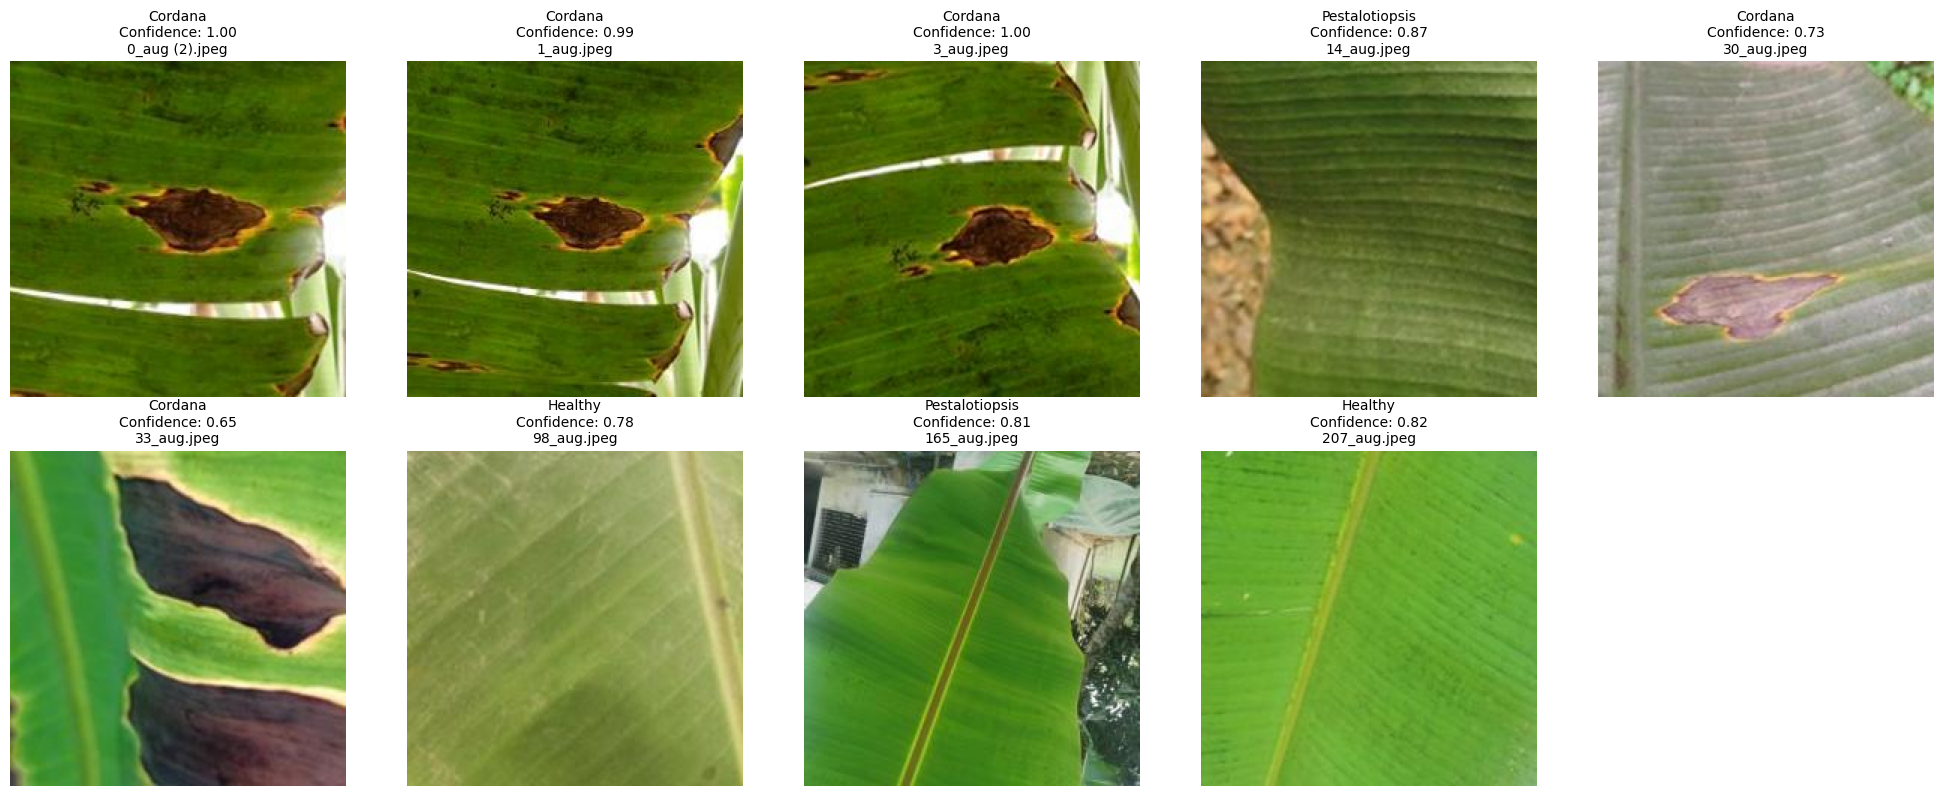

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import os
import zipfile

# Define paths
source_dir = os.path.join(extract_dir, 'BananaLSD/AugmentedSet')  # Adjust for nested structure
train_dir = '/content/dataset/train'
test_dir = '/content/dataset/test'

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 80% train, 20% test
)

# Load training and validation data directly from source_dir
train_generator = train_datagen.flow_from_directory(
    source_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    classes=['healthy', 'sigatoka', 'cordana', 'pestalotiopsis']
)

validation_generator = train_datagen.flow_from_directory(
    source_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    classes=['healthy', 'sigatoka', 'cordana', 'pestalotiopsis']
)

# Build the multi-class CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes: healthy, sigatoka, cordana, pestalotiopsis
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
epochs = 10
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

# Save the new multi-class model
model.save('/content/banana_multiclass_classifier.h5')

# Function to predict exact disease and return result with cure
def predict_banana_disease(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0]
    class_names = ['Healthy', 'Sigatoka', 'Cordana', 'Pestalotiopsis']
    predicted_class_idx = np.argmax(prediction)
    predicted_class = class_names[predicted_class_idx]
    confidence = prediction[predicted_class_idx]

    # Define cures based on predicted disease
    if predicted_class == 'Healthy':
        cure = "Maintain regular care; no treatment needed."
    elif predicted_class == 'Sigatoka':
        cure = "Spray propiconazole (0.1%) every 10-14 days; remove infected leaves."
    elif predicted_class == 'Cordana':
        cure = "Apply copper oxychloride (3 g/L); improve air circulation."
    elif predicted_class == 'Pestalotiopsis':
        cure = "Use mancozeb (0.2%); prune affected areas."

    return img, predicted_class, confidence, cure

# Function to process and display multiple images
def process_multiple_images(image_dict):
    if not image_dict:
        print("No images uploaded.")
        return

    image_paths = list(image_dict.keys())[:10]  # Limit to 10
    num_images = len(image_paths)

    for filename in image_paths:
        with open(filename, 'wb') as f:
            f.write(image_dict[filename])

    rows = 2 if num_images > 5 else 1
    cols = min(num_images, 5) if num_images <= 5 else 5

    plt.figure(figsize=(cols * 4, rows * 4))

    for i, img_path in enumerate(image_paths):
        img, disease, confidence, cure = predict_banana_disease(img_path)
        filename = os.path.basename(img_path)

        print(f"\nImage: {filename}")
        print(f"Predicted Disease: {disease}")
        print(f"Confidence: {confidence:.2f}")
        print(f"Suggested Cure: {cure}")

        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.title(f"{disease}\nConfidence: {confidence:.2f}\n{filename}", fontsize=10)
        plt.axis('off')

        os.remove(img_path)

    plt.tight_layout()
    plt.show()

# Upload images for prediction
print("Please upload up to 10 banana leaf images for disease prediction.")
uploaded = files.upload()

# Process the uploaded images
process_multiple_images(uploaded)

# Download the new model
files.download('/content/banana_multiclass_classifier.h5')